In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_predict

In [2]:

df = pd.read_csv('D:\\Credit Card Fraud\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isna().sum()
df.duplicated().sum()

np.int64(1081)

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


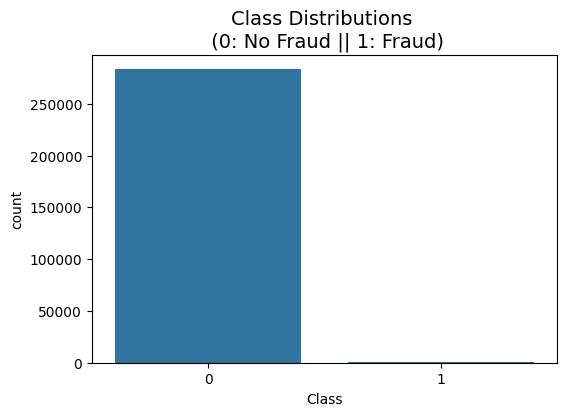

In [9]:
plt.figure(figsize=(6,4))   
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

# Some features need scaling log and scaler (Time- Amount)

array([[<Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'Time'}>]], dtype=object)

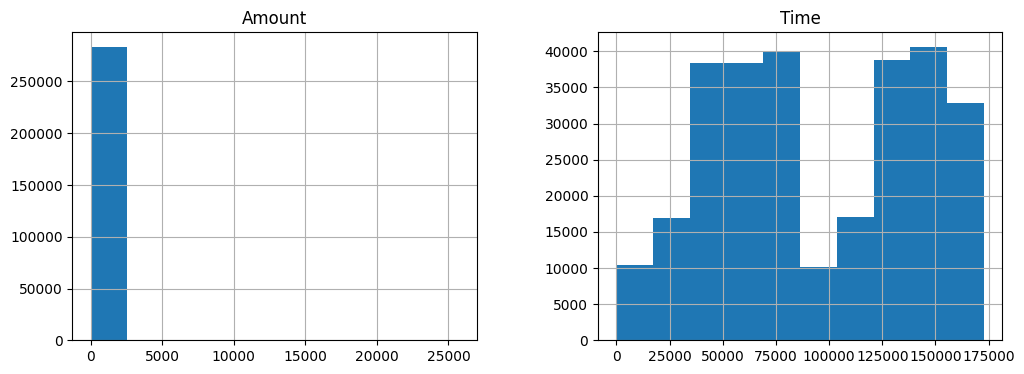

In [10]:
df[['Amount', 'Time']].hist(figsize=(12,4))

<Axes: >

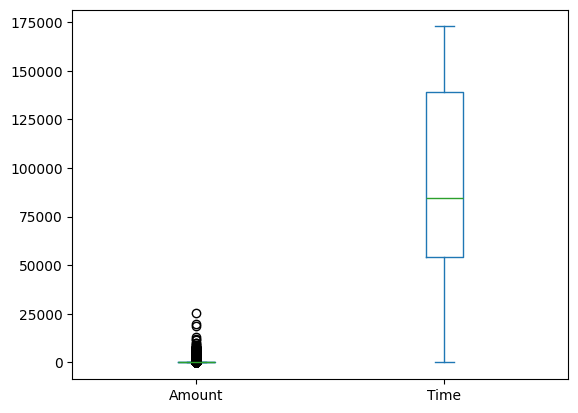

In [11]:
df[['Amount', 'Time']].plot.box()

## Split Data First To avoid Any Data Leakage

In [12]:
X=df.drop('Class', axis=1)
y=df['Class']       
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# 1- undersampling Randomly

Number of fraud samples: 473
Original dataset shape: (283726, 31)
Undersampled dataset shape: (946, 31)
Class
1    473
0    473
Name: count, dtype: int64


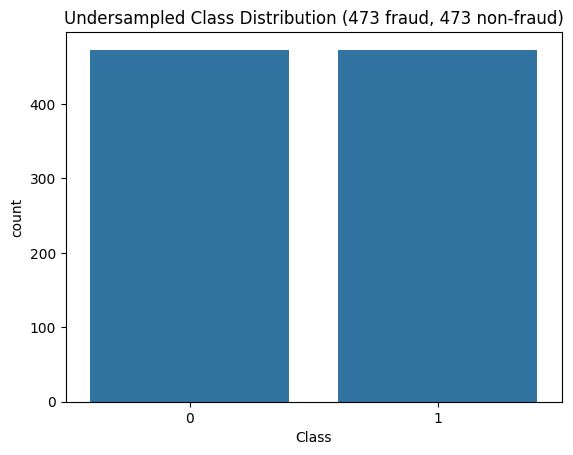

In [13]:
# Undersample: keep all frauds and randomly sample same number of non-fraud
fraud_df = df[df['Class'] == 1]
n_fraud = len(fraud_df)
print('Number of fraud samples:', n_fraud)
# sample same number of non-fraud records
nonfraud_df = df[df['Class'] == 0].sample(n=n_fraud, random_state=42)
# combine and shuffle
df_undersampled = pd.concat([fraud_df, nonfraud_df]).sample(frac=1, random_state=42).reset_index(drop=True)
print('Original dataset shape:', df.shape)
print('Undersampled dataset shape:', df_undersampled.shape)
print(df_undersampled['Class'].value_counts())
sns.countplot(x='Class', data=df_undersampled)
plt.title('Undersampled Class Distribution ({} fraud, {} non-fraud)'.format(n_fraud, n_fraud))
plt.show()

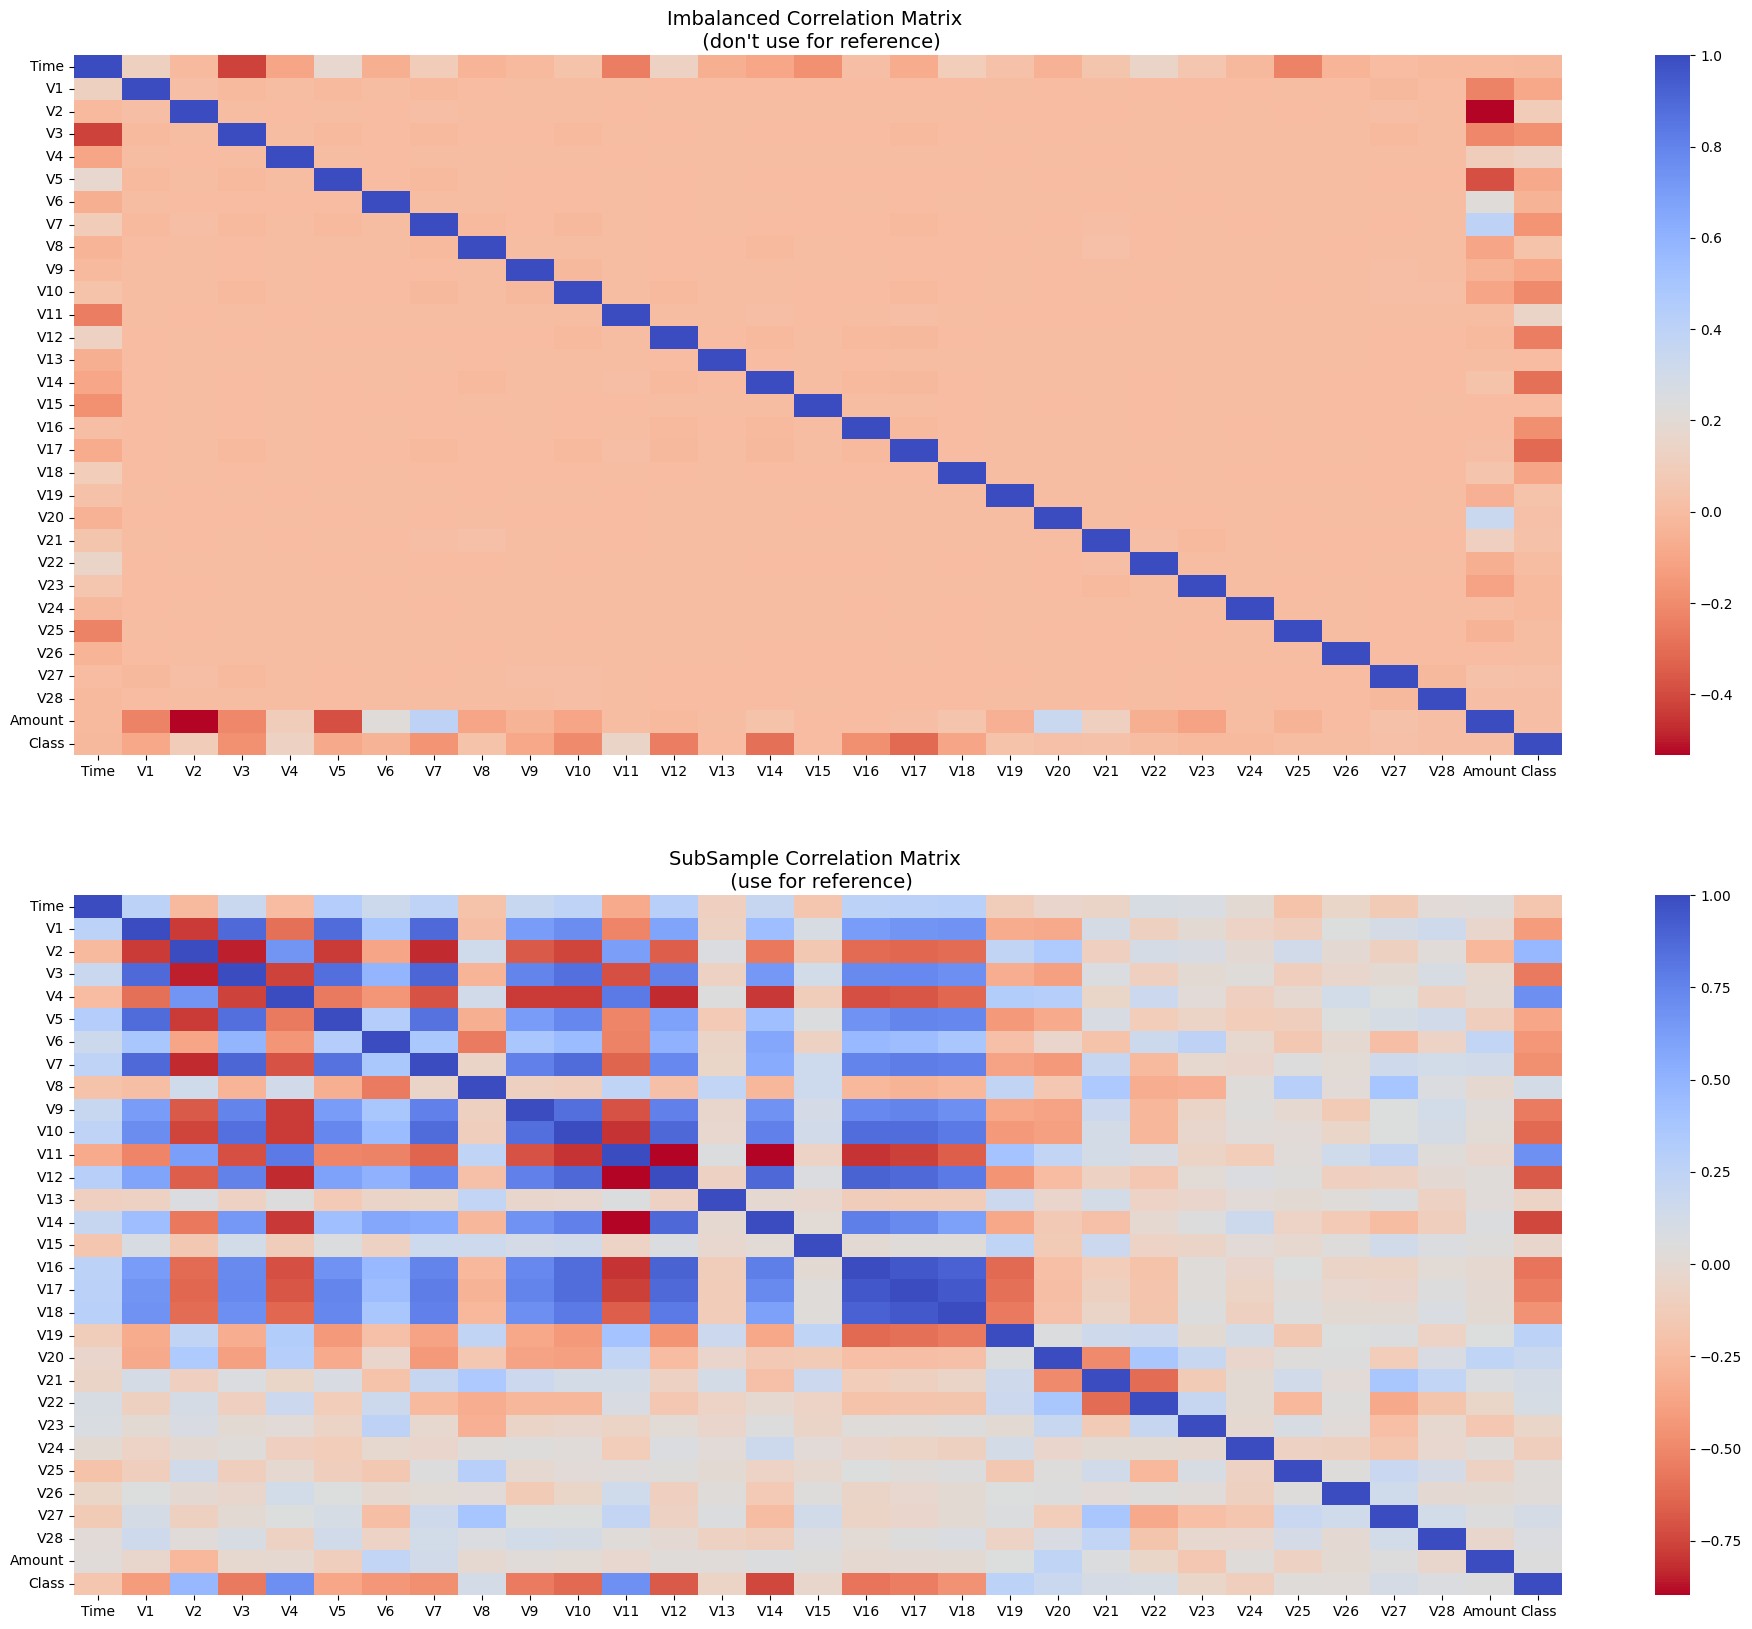

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = df_undersampled.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

## We don’t need to remove outliers because they may be part of the underlying pattern. Instead, we can use models that are not sensitive to outliers 

In [15]:
df_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    946 non-null    float64
 1   V1      946 non-null    float64
 2   V2      946 non-null    float64
 3   V3      946 non-null    float64
 4   V4      946 non-null    float64
 5   V5      946 non-null    float64
 6   V6      946 non-null    float64
 7   V7      946 non-null    float64
 8   V8      946 non-null    float64
 9   V9      946 non-null    float64
 10  V10     946 non-null    float64
 11  V11     946 non-null    float64
 12  V12     946 non-null    float64
 13  V13     946 non-null    float64
 14  V14     946 non-null    float64
 15  V15     946 non-null    float64
 16  V16     946 non-null    float64
 17  V17     946 non-null    float64
 18  V18     946 non-null    float64
 19  V19     946 non-null    float64
 20  V20     946 non-null    float64
 21  V21     946 non-null    float64
 22  V2

In [16]:
X_u=df_undersampled.drop('Class', axis=1)
y_u=df_undersampled['Class']       
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_u, y_u, test_size=0.25, random_state=42, stratify=y_u)

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Log transform Amount
X_train_u['Amount'] = np.log1p(X_train_u['Amount'])
X_test_u['Amount'] = np.log1p(X_test_u['Amount'])

# Scale Time and Amount
scaler = StandardScaler()
X_train_u[['Time', 'Amount']] = scaler.fit_transform(X_train_u[['Time', 'Amount']])
X_test_u[['Time', 'Amount']] = scaler.transform(X_test_u[['Time', 'Amount']])

X_train_u.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 163 to 875
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    709 non-null    float64
 1   V1      709 non-null    float64
 2   V2      709 non-null    float64
 3   V3      709 non-null    float64
 4   V4      709 non-null    float64
 5   V5      709 non-null    float64
 6   V6      709 non-null    float64
 7   V7      709 non-null    float64
 8   V8      709 non-null    float64
 9   V9      709 non-null    float64
 10  V10     709 non-null    float64
 11  V11     709 non-null    float64
 12  V12     709 non-null    float64
 13  V13     709 non-null    float64
 14  V14     709 non-null    float64
 15  V15     709 non-null    float64
 16  V16     709 non-null    float64
 17  V17     709 non-null    float64
 18  V18     709 non-null    float64
 19  V19     709 non-null    float64
 20  V20     709 non-null    float64
 21  V21     709 non-null    float64
 22  V22  

<Axes: >

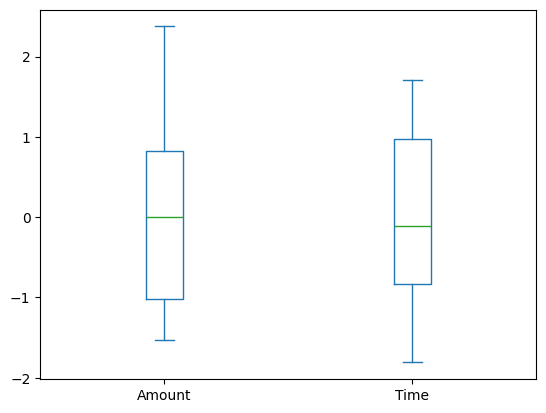

In [18]:
X_train_u[['Amount', 'Time']].plot.box()

In [19]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_train_u.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_train_u.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X_train_u.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 4.3 s
PCA took 0.01 s
Truncated SVD took 0.002 s


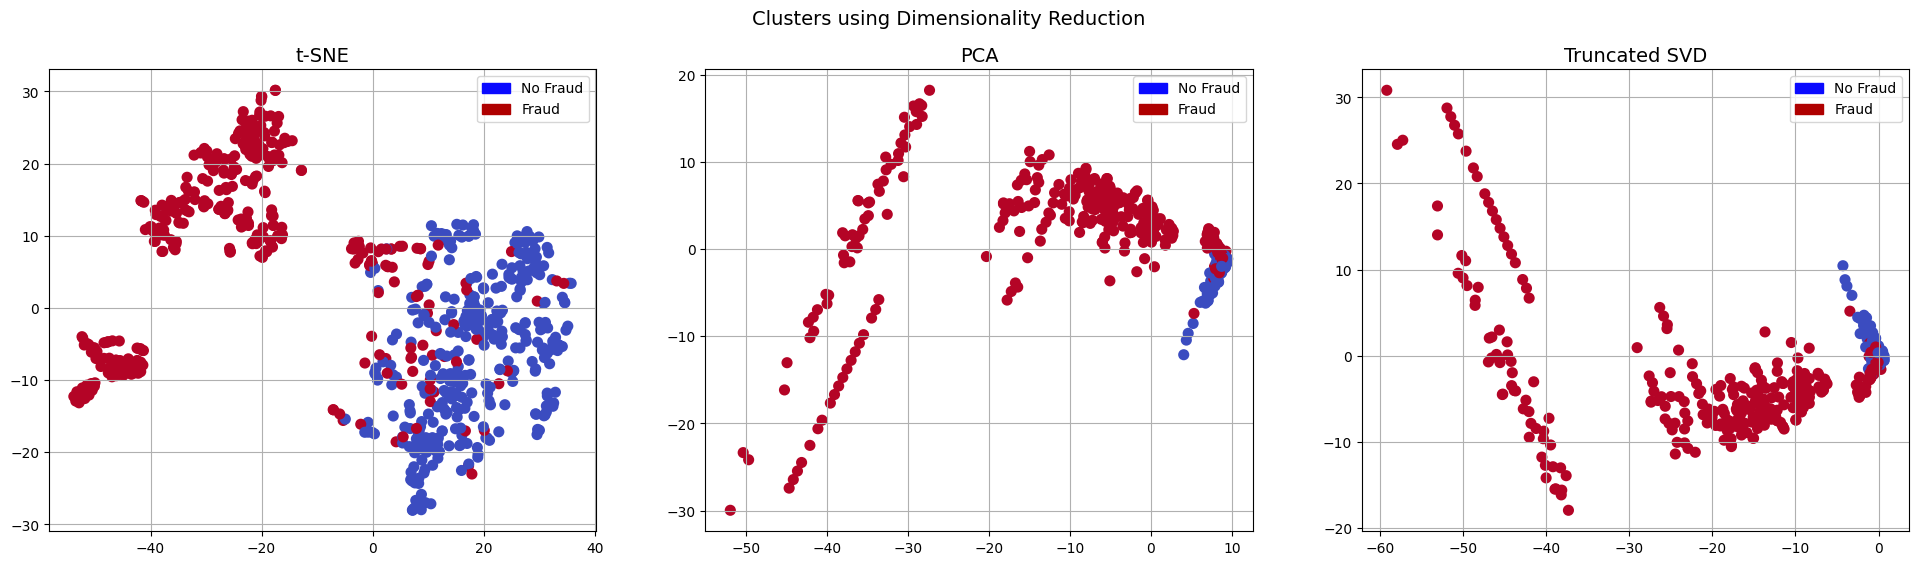

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=y_train_u, cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=y_train_u, cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=y_train_u, cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

print("Cross-validation with class_weight='balanced':")
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
roc_auc_scores = []

for fold, (train_index, val_index) in enumerate(skf.split(X_train_u, y_train_u)):
    print(f"--- Fold {fold+1} ---")
    # Split data for this fold
    X_train_fold, X_val_fold = X_train_u.iloc[train_index], X_train_u.iloc[val_index]
    y_train_fold, y_val_fold = y_train_u.iloc[train_index], y_train_u.iloc[val_index]

    # Train model
    model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
    model.fit(X_train_fold, y_train_fold)

    # Predictions
    y_pred_val = model.predict(X_val_fold)
    
    # Evaluation
    print(classification_report(y_val_fold, y_pred_val))
    
    # Store ROC AUC
    roc_auc = roc_auc_score(y_val_fold, model.predict_proba(X_val_fold)[:, 1])
    roc_auc_scores.append(roc_auc)
    print(f"ROC AUC for fold {fold+1}: {roc_auc}")

print(f"\nAverage ROC AUC across all folds: {np.mean(roc_auc_scores):.4f}")



Cross-validation with class_weight='balanced':
--- Fold 1 ---
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        71
           1       0.93      0.89      0.91        71

    accuracy                           0.91       142
   macro avg       0.91      0.91      0.91       142
weighted avg       0.91      0.91      0.91       142

ROC AUC for fold 1: 0.9561594921642531
--- Fold 2 ---
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        71
           1       0.97      0.89      0.93        71

    accuracy                           0.93       142
   macro avg       0.93      0.93      0.93       142
weighted avg       0.93      0.93      0.93       142

ROC AUC for fold 2: 0.9779805594128149
--- Fold 3 ---
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.97      0.94      0.96        71

    accuracy

In [22]:

# Train final model on the whole training set
final_model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
final_model.fit(X_train_u, y_train_u)

# Predict on test data
y_pred_test = final_model.predict(X_test)

# Final classification report
print(classification_report(y_test, y_pred_test))
roc_auc_test = roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])
print(f"ROC AUC on Test Set: {roc_auc_test:.4f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.00      0.00      0.00       118

    accuracy                           1.00     70932
   macro avg       0.50      0.50      0.50     70932
weighted avg       1.00      1.00      1.00     70932

ROC AUC on Test Set: 0.5007


## Undersampling leads to poor performance because it causes a significant loss of information.

## 2- Class weight approach

In [23]:
X_train['Amount'] = np.log1p(X_train['Amount'])
X_test['Amount'] = np.log1p(X_test['Amount'])

# Scale Time and Amount
scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
29031,-1.255369,1.028040,0.000605,1.827002,3.129091,-1.113836,0.413892,-0.665573,0.264259,0.714350,...,-0.181718,-0.279263,-0.426700,0.064734,0.716834,0.358839,-0.080531,0.057394,0.038398,-0.098379
228014,1.061717,1.995130,0.112358,-1.608313,0.338091,0.452884,-0.559138,0.115485,-0.104591,0.146493,...,-0.109246,-0.284774,-0.740514,0.343097,0.623906,-0.313782,0.145760,-0.061507,-0.036911,-0.458520
208025,0.885315,-1.149643,1.304833,0.928057,-0.431527,0.297815,-0.551020,0.849476,0.246270,-0.941554,...,-0.070979,-0.107010,-0.376968,-0.299559,0.097597,0.694817,-0.373437,-0.216605,-0.023688,-0.072631
213808,0.937076,-0.475978,1.295079,-0.771354,-1.135001,1.193496,-1.773013,2.006649,-0.774641,-0.002023,...,0.299516,0.139083,0.979610,-0.256990,0.119326,-0.194859,0.063975,0.444008,0.209819,0.061168
156263,0.269392,-1.247290,0.178527,1.916522,-0.432584,1.196505,1.612433,0.062291,0.300123,1.580567,...,-0.173014,-0.236266,-0.123861,0.109693,-1.765920,0.161812,-0.623279,-0.301285,-0.116148,-1.212654


In [24]:
# Define the cross-validation strategy
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# --- 1. Logistic Regression with Class Weight ---
print("="*30)
print("Logistic Regression with Class Weight")
print("="*30)

# Cross-validation
roc_auc_scores_lr = []
for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
    print(f"\n--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model_lr = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
    model_lr.fit(X_train_fold, y_train_fold)
    y_pred_val = model_lr.predict(X_val_fold)
    
    print("CV Classification Report:")
    print(classification_report(y_val_fold, y_pred_val))
    roc_auc = roc_auc_score(y_val_fold, model_lr.predict_proba(X_val_fold)[:, 1])
    roc_auc_scores_lr.append(roc_auc)
    print(f"ROC AUC for fold {fold+1}: {roc_auc:.4f}")

print(f"\nAverage ROC AUC for Logistic Regression (CV): {np.mean(roc_auc_scores_lr):.4f}")




# --- 2. Random Forest with Class Weight ---
print("\n" + "="*30)
print("Random Forest with Class Weight")
print("="*30)

# Cross-validation
roc_auc_scores_rf = []
for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
    print(f"\n--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model_rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
    model_rf.fit(X_train_fold, y_train_fold)
    y_pred_val_rf = model_rf.predict(X_val_fold)
    
    print("CV Classification Report:")
    print(classification_report(y_val_fold, y_pred_val_rf))
    roc_auc_rf = roc_auc_score(y_val_fold, model_rf.predict_proba(X_val_fold)[:, 1])
    roc_auc_scores_rf.append(roc_auc_rf)
    print(f"ROC AUC for fold {fold+1}: {roc_auc_rf:.4f}")

print(f"\nAverage ROC AUC for Random Forest (CV): {np.mean(roc_auc_scores_rf):.4f}")


Logistic Regression with Class Weight

--- Fold 1 ---
CV Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     42488
           1       0.05      0.90      0.10        71

    accuracy                           0.97     42559
   macro avg       0.53      0.94      0.54     42559
weighted avg       1.00      0.97      0.98     42559

ROC AUC for fold 1: 0.9702

--- Fold 2 ---
CV Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42488
           1       0.06      0.87      0.12        71

    accuracy                           0.98     42559
   macro avg       0.53      0.93      0.55     42559
weighted avg       1.00      0.98      0.99     42559

ROC AUC for fold 2: 0.9828

--- Fold 3 ---
CV Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42488
           1       

In [25]:
# Final evaluation on test set
print("\n--- Final Evaluation on Test Set (Logistic Regression) ---")
final_model_lr = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)
final_model_lr.fit(X_train, y_train)
y_pred_test_lr = final_model_lr.predict(X_test)

print("Final Test Set Classification Report:")
print(classification_report(y_test, y_pred_test_lr))
roc_auc_test_lr = roc_auc_score(y_test, final_model_lr.predict_proba(X_test)[:, 1])
print(f"ROC AUC on Test Set: {roc_auc_test_lr:.4f}")


--- Final Evaluation on Test Set (Logistic Regression) ---
Final Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     70814
           1       0.05      0.89      0.10       118

    accuracy                           0.97     70932
   macro avg       0.53      0.93      0.55     70932
weighted avg       1.00      0.97      0.99     70932

ROC AUC on Test Set: 0.9680


In [26]:
# Final evaluation on test set
print("\n--- Final Evaluation on Test Set (Random Forest) ---")
final_model_rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
final_model_rf.fit(X_train, y_train)
y_pred_test_rf = final_model_rf.predict(X_test)

print("Final Test Set Classification Report:")
print(classification_report(y_test, y_pred_test_rf))
roc_auc_test_rf = roc_auc_score(y_test, final_model_rf.predict_proba(X_test)[:, 1])
print(f"ROC AUC on Test Set: {roc_auc_test_rf:.4f}")


--- Final Evaluation on Test Set (Random Forest) ---
Final Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.96      0.73      0.83       118

    accuracy                           1.00     70932
   macro avg       0.98      0.86      0.91     70932
weighted avg       1.00      1.00      1.00     70932

ROC AUC on Test Set: 0.9391


## 3- SMOTE (Oversampling)  With RF

In [27]:
smote_pipeline_rf = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

print("="*30)
print("Cross-Validation with SMOTE (Random Forest)")
print("="*30)

# Use cross_val_predict to get predictions for the entire training set
y_pred_cv_smote_rf = cross_val_predict(smote_pipeline_rf, X_train, y_train, cv=skf)

print("Final CV Classification Report (SMOTE + Random Forest):")
print(classification_report(y_train, y_pred_cv_smote_rf))
roc_auc_cv_smote_rf = roc_auc_score(y_train, y_pred_cv_smote_rf)
print(f"Overall ROC AUC for CV (SMOTE + Random Forest): {roc_auc_cv_smote_rf:.4f}")


print("\n" + "="*30)
print("Final Evaluation on Test Set (SMOTE + Random Forest)")
print("="*30)

# Now, train the pipeline on the entire training data
smote_pipeline_rf.fit(X_train, y_train)

# And evaluate on the original, unseen test set
y_pred_test_smote_rf = smote_pipeline_rf.predict(X_test)

print("Final Test Set Classification Report (SMOTE + Random Forest):")
print(classification_report(y_test, y_pred_test_smote_rf))
roc_auc_test_smote_rf = roc_auc_score(y_test, y_pred_test_smote_rf)
print(f"ROC AUC on Test Set (SMOTE + Random Forest): {roc_auc_test_smote_rf:.4f}")

Cross-Validation with SMOTE (Random Forest)
Final CV Classification Report (SMOTE + Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212439
           1       0.90      0.81      0.85       355

    accuracy                           1.00    212794
   macro avg       0.95      0.91      0.93    212794
weighted avg       1.00      1.00      1.00    212794

Overall ROC AUC for CV (SMOTE + Random Forest): 0.9056

Final Evaluation on Test Set (SMOTE + Random Forest)
Final Test Set Classification Report (SMOTE + Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.88      0.76      0.82       118

    accuracy                           1.00     70932
   macro avg       0.94      0.88      0.91     70932
weighted avg       1.00      1.00      1.00     70932

ROC AUC on Test Set (SMOTE + Random Forest): 0.8813


## 4- NearMiss (Undersampling) 

In [28]:
from imblearn.under_sampling import NearMiss

# Apply NearMiss
print("Original class distribution:")
print(y.value_counts())

nm = NearMiss()
X_resampled_nm, y_resampled_nm = nm.fit_resample(X, y)

print("\nResampled class distribution (NearMiss):")
print(y_resampled_nm.value_counts())

# Split the new resampled data
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(
    X_resampled_nm, y_resampled_nm, test_size=0.25, random_state=42, stratify=y_resampled_nm
)

# Apply Scaling
# Log transform Amount
X_train_nm['Amount'] = np.log1p(X_train_nm['Amount'])
X_test_nm['Amount'] = np.log1p(X_test_nm['Amount'])

# Scale Time and Amount
scaler_nm = StandardScaler()
X_train_nm[['Time', 'Amount']] = scaler_nm.fit_transform(X_train_nm[['Time', 'Amount']])
X_test_nm[['Time', 'Amount']] = scaler_nm.transform(X_test_nm[['Time', 'Amount']])

Original class distribution:
Class
0    283253
1       473
Name: count, dtype: int64

Resampled class distribution (NearMiss):
Class
0    473
1    473
Name: count, dtype: int64

Resampled class distribution (NearMiss):
Class
0    473
1    473
Name: count, dtype: int64


In [29]:
# --- 2. Random Forest with NearMiss ---
print("\n" + "="*30)
print("Random Forest with NearMiss")
print("="*30)

# Cross-validation
model_rf_nm = RandomForestClassifier(random_state=42, n_jobs=-1)
y_pred_cv_rf_nm = cross_val_predict(model_rf_nm, X_train_nm, y_train_nm, cv=skf)

print("Final CV Classification Report (NearMiss + Random Forest):")
print(classification_report(y_train_nm, y_pred_cv_rf_nm))
print(f"Overall ROC AUC for CV: {roc_auc_score(y_train_nm, y_pred_cv_rf_nm):.4f}")

# Final evaluation on test set
print("\n--- Final Evaluation on Test Set (NearMiss + Random Forest) ---")
final_model_rf_nm = RandomForestClassifier(random_state=42, n_jobs=-1)
final_model_rf_nm.fit(X_train_nm, y_train_nm)
y_pred_test_rf_nm = final_model_rf_nm.predict(X_test)

print("Final Test Set Classification Report:")
print(classification_report(y_test, y_pred_test_rf_nm))
print(f"ROC AUC on Test Set: {roc_auc_score(y_test, y_pred_test_rf_nm):.4f}")


Random Forest with NearMiss
Final CV Classification Report (NearMiss + Random Forest):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       354
           1       0.98      0.94      0.96       355

    accuracy                           0.96       709
   macro avg       0.96      0.96      0.96       709
weighted avg       0.96      0.96      0.96       709

Overall ROC AUC for CV: 0.9591

--- Final Evaluation on Test Set (NearMiss + Random Forest) ---
Final CV Classification Report (NearMiss + Random Forest):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       354
           1       0.98      0.94      0.96       355

    accuracy                           0.96       709
   macro avg       0.96      0.96      0.96       709
weighted avg       0.96      0.96      0.96       709

Overall ROC AUC for CV: 0.9591

--- Final Evaluation on Test Set (NearMiss + Random Forest) ---
Final T

## Best Models Showdown: `class_weight` vs. SMOTE

--- Random Forest with class_weight='balanced' ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.96      0.73      0.83       118

    accuracy                           1.00     70932
   macro avg       0.98      0.86      0.91     70932
weighted avg       1.00      1.00      1.00     70932



--- Random Forest with SMOTE ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70814
           1       0.88      0.76      0.82       118

    accuracy                           1.00     70932
   macro avg       0.94      0.88      0.91     70932
weighted avg       1.00      1.00      1.00     70932



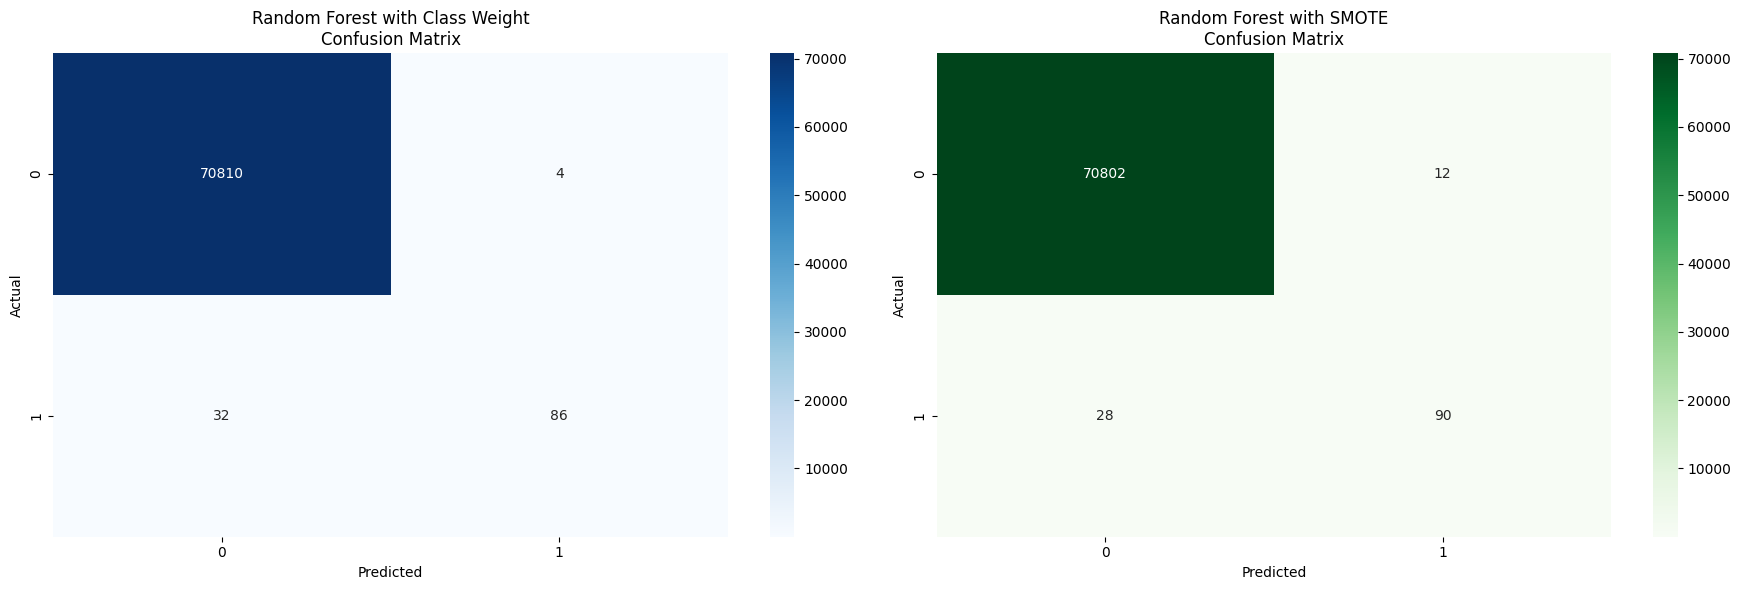

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# y_pred_test_rf is from RandomForest with class_weight='balanced'
# y_pred_test_smote_rf is from RandomForest with SMOTE pipeline

print("--- Random Forest with class_weight='balanced' ---")
print(classification_report(y_test, y_pred_test_rf))

print("\n" + "="*50 + "\n")

print("--- Random Forest with SMOTE ---")
print(classification_report(y_test, y_pred_test_smote_rf))


# Confusion Matrices
conf_matrix_cw = confusion_matrix(y_test, y_pred_test_rf)
conf_matrix_smote = confusion_matrix(y_test, y_pred_test_smote_rf)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot for class_weight
sns.heatmap(conf_matrix_cw, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Random Forest with Class Weight\nConfusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Plot for SMOTE
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Greens', ax=ax2)
ax2.set_title('Random Forest with SMOTE\nConfusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# TRY SHAP analysis to extract insights and build a rule-based model. 

## First down sampling un fraud to 45000

In [32]:

# Separate fraud and non-fraud cases
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0]

# Downsample non-fraud cases to 45,000
non_fraud_downsampled_df = non_fraud_df.sample(n=45000, random_state=42)

# Combine fraud and downsampled non-fraud cases
downsampled_df = pd.concat([fraud_df, non_fraud_downsampled_df])

# Shuffle the dataframe
downsampled_df = downsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

print('Downsampled dataset shape:', downsampled_df.shape)
print(downsampled_df['Class'].value_counts())

# Split the data
X_downsampled = downsampled_df.drop('Class', axis=1)
y_downsampled = downsampled_df['Class']

X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(
    X_downsampled, y_downsampled, test_size=0.25, random_state=42, stratify=y_downsampled
)

print('\nTrain and test set shapes:')
print(X_train_ds.shape, X_test_ds.shape, y_train_ds.shape, y_test_ds.shape)


Downsampled dataset shape: (45473, 31)
Class
0    45000
1      473
Name: count, dtype: int64

Train and test set shapes:
(34104, 30) (11369, 30) (34104,) (11369,)


## Apply Scaling

In [34]:
 #Log transform Amount
X_train_ds['Amount'] = np.log1p(X_train_ds['Amount'])
X_test_ds['Amount'] = np.log1p(X_test_ds['Amount'])

# Scale Time and Amount
scaler = StandardScaler()
X_train_ds[['Time', 'Amount']] = scaler.fit_transform(X_train_ds[['Time', 'Amount']])
X_test_ds[['Time', 'Amount']] = scaler.transform(X_test_ds[['Time', 'Amount']])

X_train_ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1370,-0.492072,-1.885069,1.593764,0.810113,0.239958,-1.172590,-0.940243,-0.182094,0.837377,0.308221,...,-0.224536,-0.094089,-0.442763,0.028280,0.686088,-0.071548,0.196850,-0.238777,0.104727,-0.409560
15004,0.937242,-0.497959,0.978876,0.138317,-0.977786,0.623370,-0.659917,1.148282,-0.346674,0.862213,...,0.384465,-0.448232,-0.681192,-0.005916,-0.402933,-0.434660,0.103813,0.217292,-0.162584,-0.881749
35081,-0.279590,-1.127007,1.311523,1.300428,-0.631404,-0.349168,-0.878366,0.396063,0.478202,-0.625615,...,-0.168458,-0.090682,-0.483595,0.046526,0.491441,-0.315063,-0.129355,0.030644,0.109097,-1.795627
35797,-0.245265,-1.465677,1.614039,0.286976,-0.623845,0.366588,0.579148,0.140552,0.756004,-0.163068,...,0.388922,-0.290734,-0.695208,-0.076746,-1.372050,0.068144,0.184028,0.465333,0.232543,-0.406386
7945,-1.188998,1.135543,-0.996220,0.216922,-0.612320,-1.035238,-0.381338,-0.491986,-0.030894,-0.766294,...,0.303425,0.075181,-0.108317,-0.152480,0.009589,0.427980,-0.310250,-0.020925,0.022868,0.797462


In [55]:
X_train_ds['V14'].max()



np.float64(6.72483227498592)

## Make model for new sampled Data

In [35]:
# Final evaluation on test set
print("\n--- Final Evaluation on Test Set (Random Forest) ---")
final_model_rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
final_model_rf.fit(X_train_ds, y_train_ds)
y_pred_test_rf = final_model_rf.predict(X_test_ds)

print("Final Test Set Classification Report:")
print(classification_report(y_test_ds, y_pred_test_rf))
roc_auc_test_rf = roc_auc_score(y_test_ds, final_model_rf.predict_proba(X_test_ds)[:, 1])
print(f"ROC AUC on Test Set: {roc_auc_test_rf:.4f}")


--- Final Evaluation on Test Set (Random Forest) ---
Final Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11251
           1       1.00      0.83      0.91       118

    accuracy                           1.00     11369
   macro avg       1.00      0.92      0.95     11369
weighted avg       1.00      1.00      1.00     11369

ROC AUC on Test Set: 0.9740
Final Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11251
           1       1.00      0.83      0.91       118

    accuracy                           1.00     11369
   macro avg       1.00      0.92      0.95     11369
weighted avg       1.00      1.00      1.00     11369

ROC AUC on Test Set: 0.9740


# Go to SHAP Graph

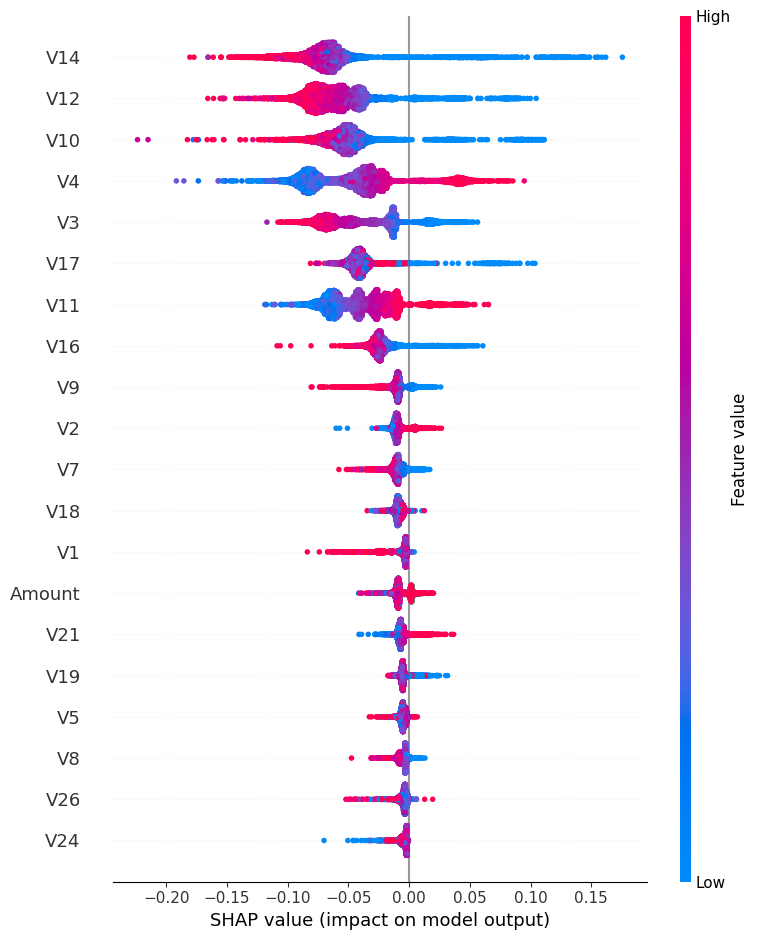

In [ ]:
import shap

explainer = shap.TreeExplainer(final_model_rf)
shap_values = explainer.shap_values(X_test_ds)

shap.summary_plot(shap_values[:,:,1], X_test_ds)


In [47]:
print(X_test_ds.shape)
print(shap_values.shape)

(11369, 30)
(11369, 30, 2)



### Interpreting the SHAP Plot for Rule Generation
The SHAP summary plot provides a strong overview of the most important features and how they influence the model’s predictions. To build a rule-based system, we can examine each feature individually and understand how its values relate to the corresponding SHAP values.

From the plot, we notice that V14 is one of the most influential features. The summary plot shows that low values of V14 (blue points) produce high positive SHAP values, meaning they push the model’s prediction toward fraud. To visualize this relationship more clearly, we can generate a SHAP dependence plot for V14.


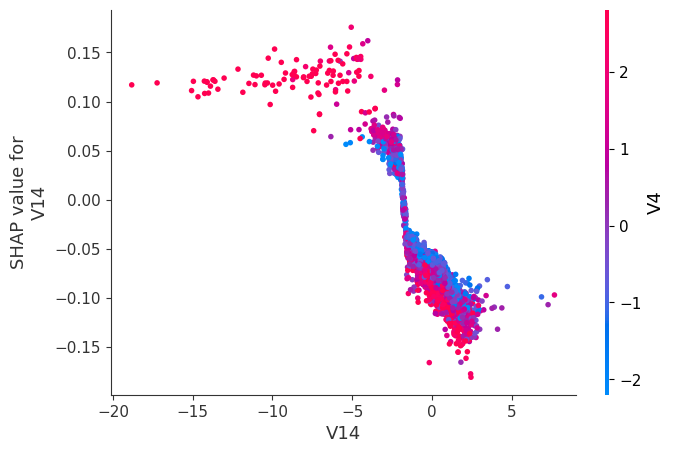

In [ ]:

shap.dependence_plot('V14', shap_values[:,:,1], X_test_ds)



### Deriving a Simple Rule from the Dependence Plot

The dependence plot for `V14` clearly shows that as the value of `V14` decreases, the SHAP value increases, indicating a higher likelihood of fraud. We can see a significant jump in SHAP values when `V14` is less than approximately -5.

Based on this, we can formulate a simple rule:
**If `V14` < -5, then predict Fraud.**

Let's see how this simple rule performs on our test data.


## Try building a rule-based model based on the patterns we observed in the SHAP plot.

--- Evaluation of Simple Rule-Based Model (V14 < -5) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11251
           1       0.91      0.70      0.79       118

    accuracy                           1.00     11369
   macro avg       0.95      0.85      0.90     11369
weighted avg       1.00      1.00      1.00     11369



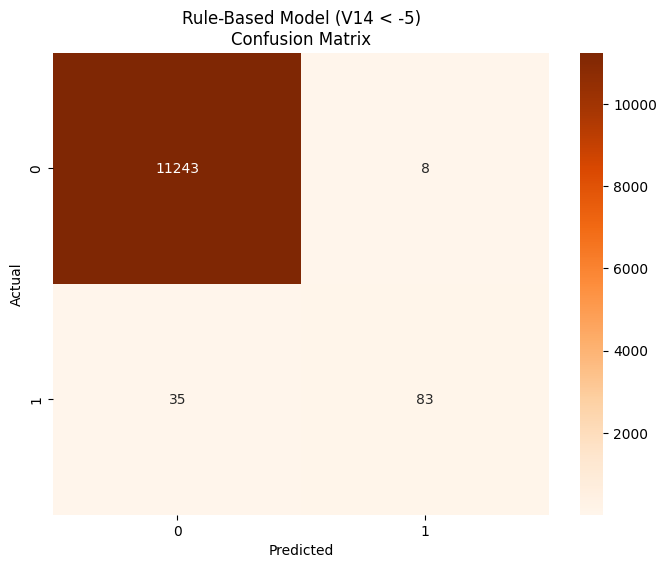

In [67]:

rule_based_predictions = (X_test_ds['V14'] < -5.).astype(int)

# Evaluate the rule-based model
print("--- Evaluation of Simple Rule-Based Model (V14 < -5) ---")
print(classification_report(y_test_ds, rule_based_predictions))

# Confusion Matrix for the rule-based model
conf_matrix_rule = confusion_matrix(y_test_ds, rule_based_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rule, annot=True, fmt='d', cmap='Oranges')
plt.title('Rule-Based Model (V14 < -5)\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### It gives us good results as an initial experiment with solid performance, and I look forward to improving it further in the future.